In [1]:
__author__ = "Ankur Dhoot"

## Dynamic Programming Notebook

### Purpose

This notebook will introduce dynamic programming. 

### Set-Up

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import math

### Data Generation

In [28]:
def generate_random_sample(n):
    # Generate a random list of n numbers
    return random.choices(range(-15, 15), k=n)

In [29]:
generate_random_sample(10)

[-6, -8, -12, 0, -11, -6, 13, -5, 10, -8]

In [30]:
generate_random_sample(20)

[-9, 1, -4, 12, 1, -3, -1, -13, -12, -7, -5, 12, 2, 7, 2, 3, 10, 7, 6, -9]

### Maximum Subarray Problem

https://en.wikipedia.org/wiki/Maximum_subarray_problem

#### Brute Force

In [31]:
def brute_force(array):
    n = len(array)
    # Track what the maximum subarray sum seen so far is.
    max_sum = -math.inf
    # Compute the sum between array[i..j] for all (i, j) pairs.
    for i in range(n):
        for j in range(i, n + 1):
            subarray_sum = sum(array[i:j])
            if subarray_sum > max_sum:
                # We found a better subarray.
                max_sum = subarray_sum
    return max_sum
            

In [32]:
assert brute_force([0]) == 0
assert brute_force([-1]) == 0
assert brute_force([1, 2, 3]) == 6
assert brute_force([1, -1, 2]) == 2
assert brute_force([2, -1, 2, -1, 2]) == 4
assert brute_force([-2, 1, -3, 4, -1, 2, 1, -5, 4]) == 6

#### Dynamic Programming

Let dp[j] denote the maximum sum over all i of array[i...j]. That is, dp[j] is the maximum subarray sum ending at index j.

Then dp[j+1] = max(0, array[j], dp[j] + array[j+1]).

In words, this says that the maximum subarray sum ending at index j is either the empty array (with value 0),
just the jth element by itself, or the jth element added to the maximum subarray sum ending at index j - 1.

The maximum subarray sum is then the largest value in the dp array (since the max subarray sum must end at *some* index).

In [56]:
def dynamic_programming(array):
    n = len(array)
    dp = [0] * n
    for j in range(n):
        dp[j] = max(0, array[j], array[j] + dp[j-1])
    return max(dp)

In [57]:
assert dynamic_programming([0]) == 0
assert dynamic_programming([-1]) == 0
assert dynamic_programming([1, 2, 3]) == 6
assert dynamic_programming([1, -1, 2]) == 2
assert dynamic_programming([2, -1, 2, -1, 2]) == 4
assert dynamic_programming([-2, 1, -3, 4, -1, 2, 1, -5, 4]) == 6

### Runtime Comparison

Let's generate some test data and see how these algorithms compare.

In [45]:
# Average over num_runs.
num_runs = 100
# list size
size = 200

#### Brute Force

In [46]:
brute_force_start_time = time.time()
for run in range(num_runs):
    # Generate the list of random numbers
    array = generate_random_sample(size)
    brute_force(array)
brute_force_end_time = time.time()

avg_time = (brute_force_end_time - brute_force_start_time) / num_runs
print('Brute Force Average Time %fs' % avg_time)

Selection Sort Average Time 0.020248s


#### Dynamic Programming

In [47]:
dynamic_programming_start_time = time.time()
for run in range(num_runs):
    # Generate the list of random numbers
    array = generate_random_sample(size)
    dynamic_programming(array)
dynamic_programming_end_time = time.time()

avg_time = (dynamic_programming_end_time - dynamic_programming_start_time) / num_runs
print('Dynamic Programming Average Time %fs' % avg_time)

Selection Sort Average Time 0.000120s


####  Runtime Plots

Let's look at how brute force and dynamic programming scale with array size.

In [51]:
def eval_algorithm(algorithm, num_runs=20, list_sizes=[1, 2, 5, 10, 100, 500, 1000]):
    # Run the max subarray algorithm multiple times over different list sizes.
    timings = []

    for size in list_sizes:
        total_time = 0
        for run in range(num_runs):
            # Create a random list.
            array = generate_random_sample(size)
            start_time = time.time()
            algorithm(array)
            end_time = time.time()
            total_time += end_time - start_time

        # Record how long finding the max subarray took (on average)
        timings.append(total_time / num_runs)

    plt.plot(list_sizes, timings)
    plt.ylabel('RunTime')
    plt.xlabel('Array Size')

#### Brute Force

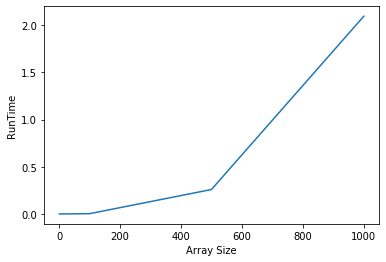

In [52]:
eval_algorithm(brute_force)

#### Dynamic Programming

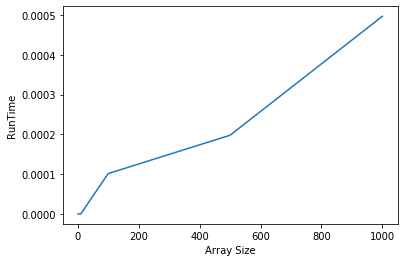

In [53]:
eval_algorithm(dynamic_programming)

### Conclusion

The brute force method is O($n^3$) whereas the dynamic programming method is O($n$)!

### Application

https://leetcode.com/problems/climbing-stairs/